In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import csv
import pickle 
import copy 

import numpy as np
import random
import time

from sklearn.model_selection import train_test_split
import sklearn.linear_model as lm
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

## Input options

In [3]:
features_names  = ['m1', 'm2', 's1x', 's1y', 's1z', 's2x', 's2y', 's2z', 'theta', 'q', 'Mc'];
regr_data_dir   = '../NewRealistic/'
write_output    = True
out_data_dir    = '../SVR_results/'
versions        = ['0', '1', '2'] # can be a subset of ['0', '1', '2']
clabels         = ['0', '1'] # can be a subset of ['0', '1']

# normalization input
normalize_x     = True
normalize_y     = True
A               = 0
B               = 1

# sample size
Ntrain          = 200000;
Ntest           = 100000;

# hyperparameters, one for each dataset ( i.e. len(versions)*len(clables) ). IMPROVE ME 
C_vec               = [1, 1, 1, 1, 1, 1]
eps_vec             = [0.01, 0.01, 0.01, 0.01, 0.01, 0.01]

## Check on input and dictionary-initialization

In [4]:
Nfeatures  = len(features_names)

# check that we are not exceeding the size of the datasets
Ntrain_max = 20000;
Ntest_max  = 15000;
Ntrain     = min(Ntrain, Ntrain_max)
Ntest      = min(Ntest,  Ntest_max )

# define dictionary for each version considered
Nv       = len(versions)
Nc       = len(clabels)
Nsets    = Nv*Nc

if Nv*Nc!=Nsets:
    print('+++ Wrong input! +++')

datasets = {}
keys     = []
for i in range(0,Nv):
    version = versions[i]
    for j in range(0,Nc):
        clabel = clabels[j]
        key = 'v'+version+'c'+clabel
        keys.append(key)
        datasets[key]         = lambda:0
        datasets[key].clabel  = clabel
        datasets[key].version = version
        datasets[key].Ntrain  = Ntrain
        datasets[key].Ntest   = Ntest
        datasets[key].C       = C_vec[i]
        datasets[key].eps     = eps_vec[i]

## Utilities

In [5]:
# function for I/O files
def extractData(filename, verbose=False):
    lst=[]
    with open(filename) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            lst.append(row)
    data=np.array(lst, dtype=float)
    if verbose:
        print(filename, 'loaded')
    return data

def writeResult(filename, data, verbose=False):
    with open(filename, 'w') as csvfile:
        spamwriter = csv.writer(csvfile, delimiter=',')
        for row in data:
            spamwriter.writerow(row)
    if verbose:
        print(filename, 'saved')
            
# functions for normalization
def normalize_data(array, A, B, data_max, data_min):
    return (B-A)/(data_max-data_min)*(array-data_max)+B
    
def original_data(array_norm, A, B, data_max, data_min):
    return (array_norm-B)*(data_max-data_min)/(B-A)+data_max

# plot function
def PredictionPlots(ytest, ypredicted, labels):
    Nfeatures = len(labels) # Nfeatures<=12 hard-coded 
    fig, axs  = plt.subplots(4,3, figsize = (25,17))
    param     = 0
    for i in range(0,4):
        for j in range(0,3):
            ytest_1d      = ytest[:,param]
            ypredicted_1d = ypredicted[:,param]
            axs[i,j].scatter(ytest_1d, ypredicted_1d)
            axs[i,j].plot(ytest_1d, ytest_1d, 'r')
            axs[i,j].set_title(labels[param])
            param+=1;
            if param>=Nfeatures:
                break
    plt.show()

## Loop on versions

********************************************************************************
Key: v0c0
********************************************************************************
../NewRealistic/v0c0train_x.csv loaded
../NewRealistic/v0c0train_y.csv loaded
../NewRealistic/v0c0test_x.csv loaded
../NewRealistic/v0c0test_y.csv loaded

SVR, rbf kernel, C=1, eps=0.01 :
score # 0: 0.99840
score # 1: 0.99731
score # 2: 0.94453
score # 3: 0.94254
score # 4: 0.94237
score # 5: 0.94307
score # 6: 0.94401
score # 7: 0.94293
score # 8: 0.87090
score # 9: 0.99683
score #10: 0.99861


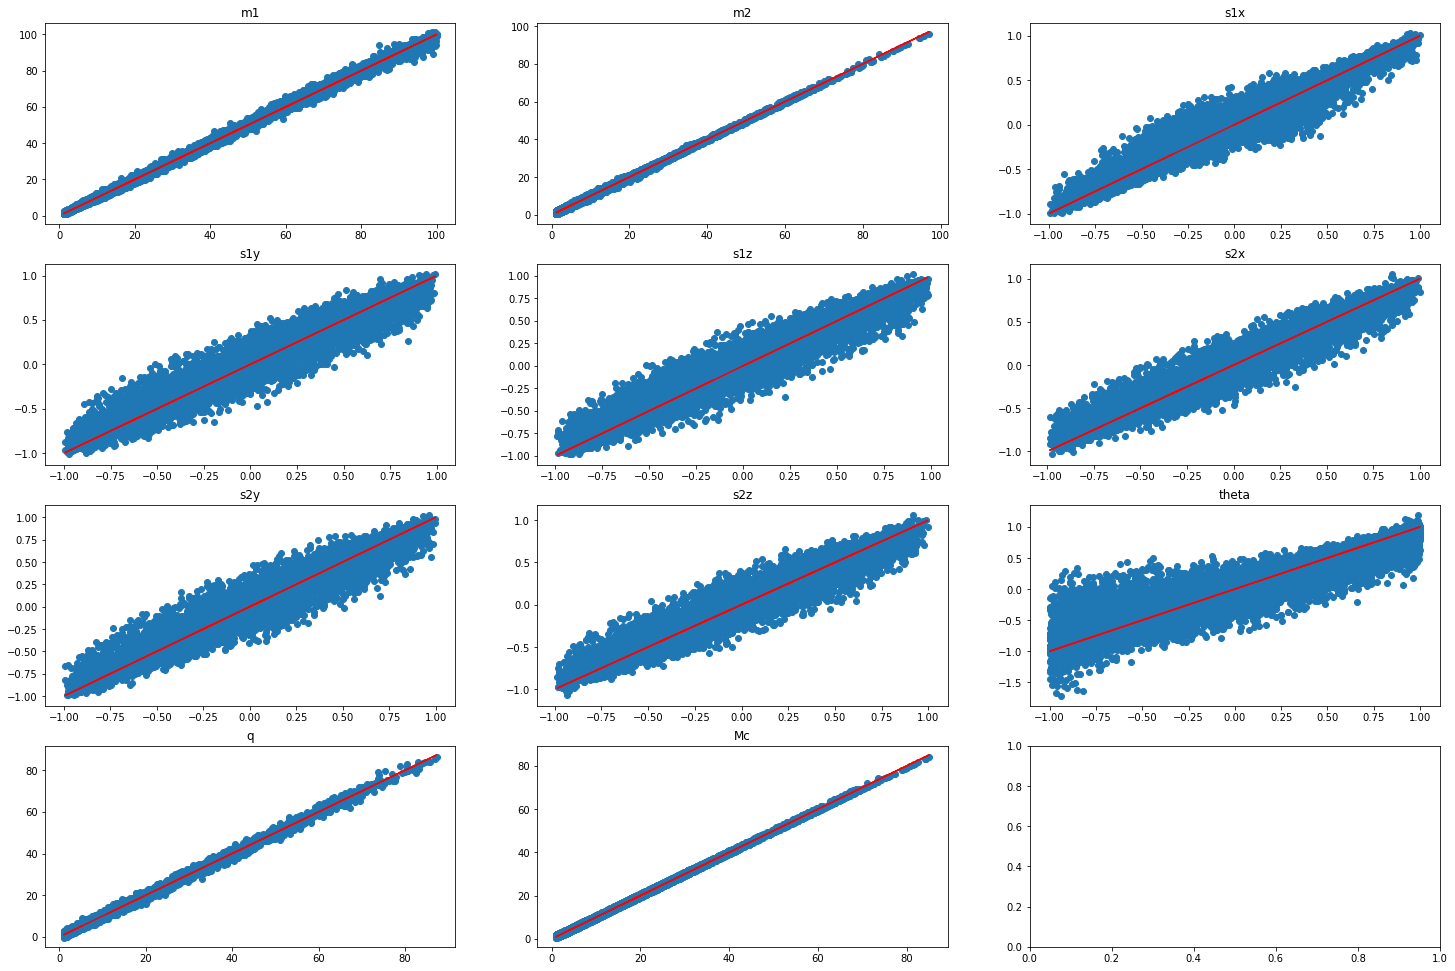

********************************************************************************
Key: v0c1
********************************************************************************
../NewRealistic/v0c1train_x.csv loaded
../NewRealistic/v0c1train_y.csv loaded
../NewRealistic/v0c1test_x.csv loaded
../NewRealistic/v0c1test_y.csv loaded

SVR, rbf kernel, C=1, eps=0.01 :
score # 0: 0.99833
score # 1: 0.99746
score # 2: 0.94087
score # 3: 0.93823
score # 4: 0.93866
score # 5: 0.94056
score # 6: 0.94054
score # 7: 0.94064
score # 8: 0.86275
score # 9: 0.99661
score #10: 0.99871


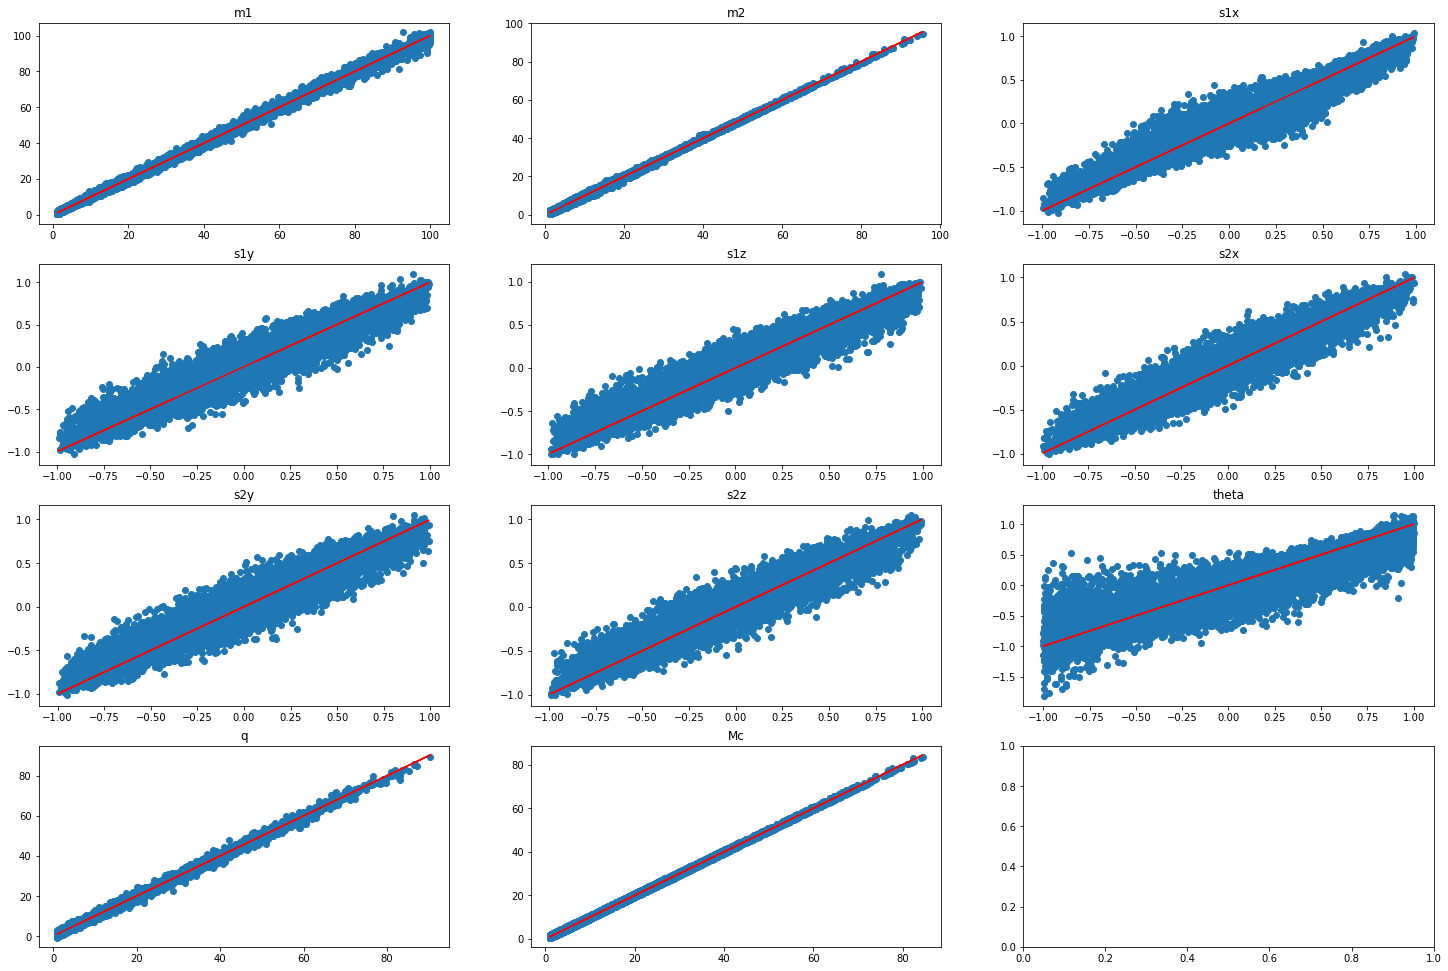

********************************************************************************
Key: v1c0
********************************************************************************
../NewRealistic/v1c0train_x.csv loaded
../NewRealistic/v1c0train_y.csv loaded
../NewRealistic/v1c0test_x.csv loaded
../NewRealistic/v1c0test_y.csv loaded

SVR, rbf kernel, C=1, eps=0.01 :
score # 0: 0.89104
score # 1: 0.97077
score # 2: 0.63101
score # 3: 0.65102
score # 4: 0.66002
score # 5: 0.69250
score # 6: 0.67644
score # 7: 0.62239
score # 8: 0.59118
score # 9: 0.94411
score #10: 0.99851


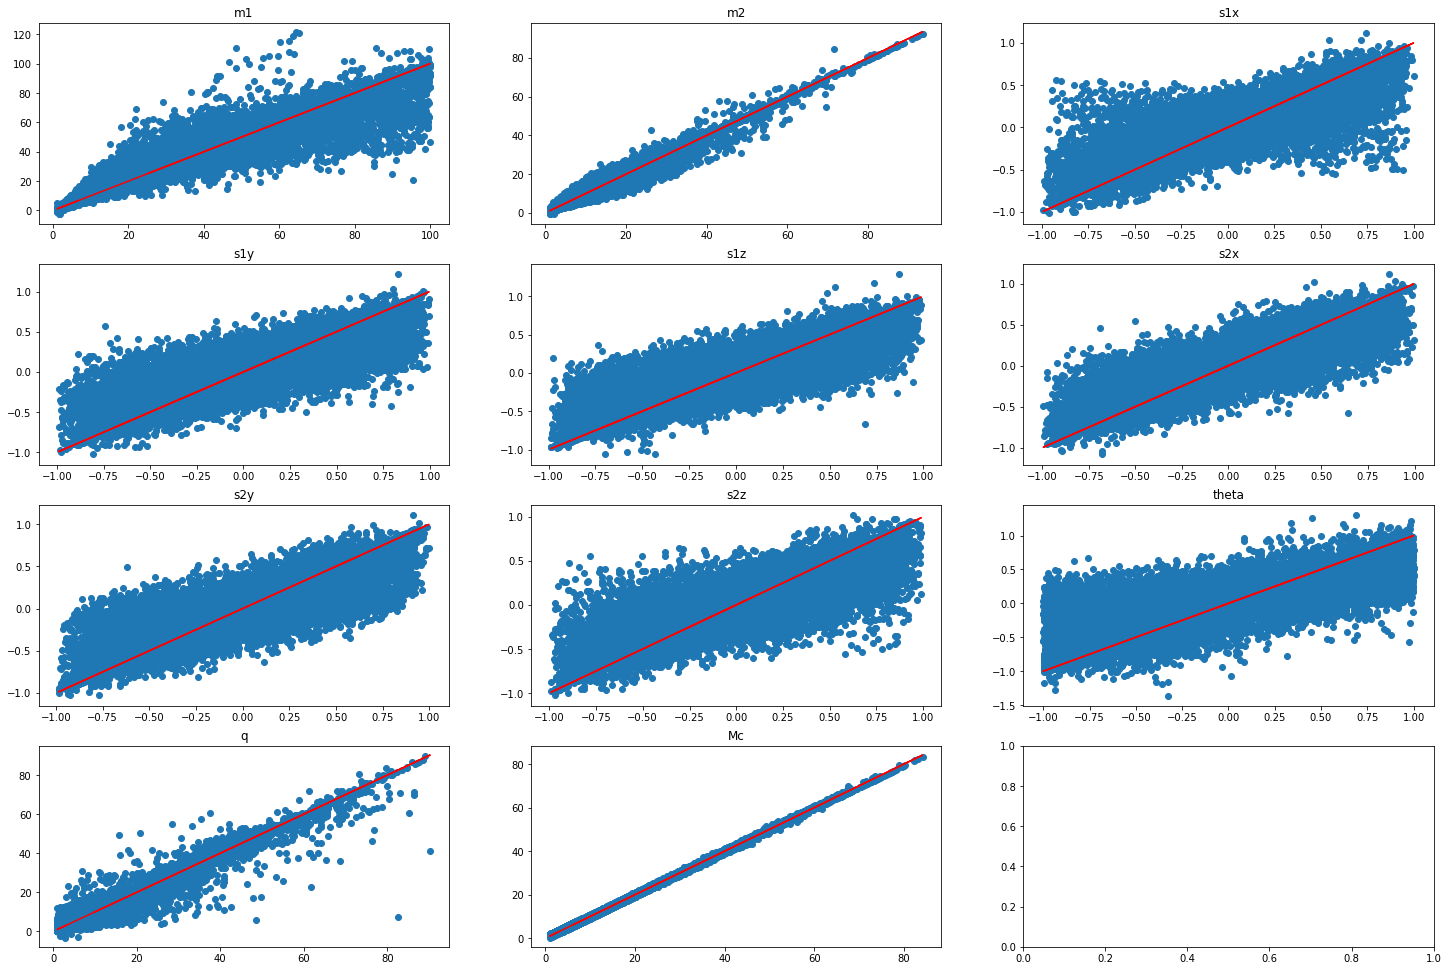

********************************************************************************
Key: v1c1
********************************************************************************
../NewRealistic/v1c1train_x.csv loaded
../NewRealistic/v1c1train_y.csv loaded
../NewRealistic/v1c1test_x.csv loaded
../NewRealistic/v1c1test_y.csv loaded

SVR, rbf kernel, C=1, eps=0.01 :
score # 0: 0.89063
score # 1: 0.96813
score # 2: 0.64363
score # 3: 0.65477
score # 4: 0.66642
score # 5: 0.70126
score # 6: 0.68089
score # 7: 0.63515
score # 8: 0.60216
score # 9: 0.94679
score #10: 0.99839


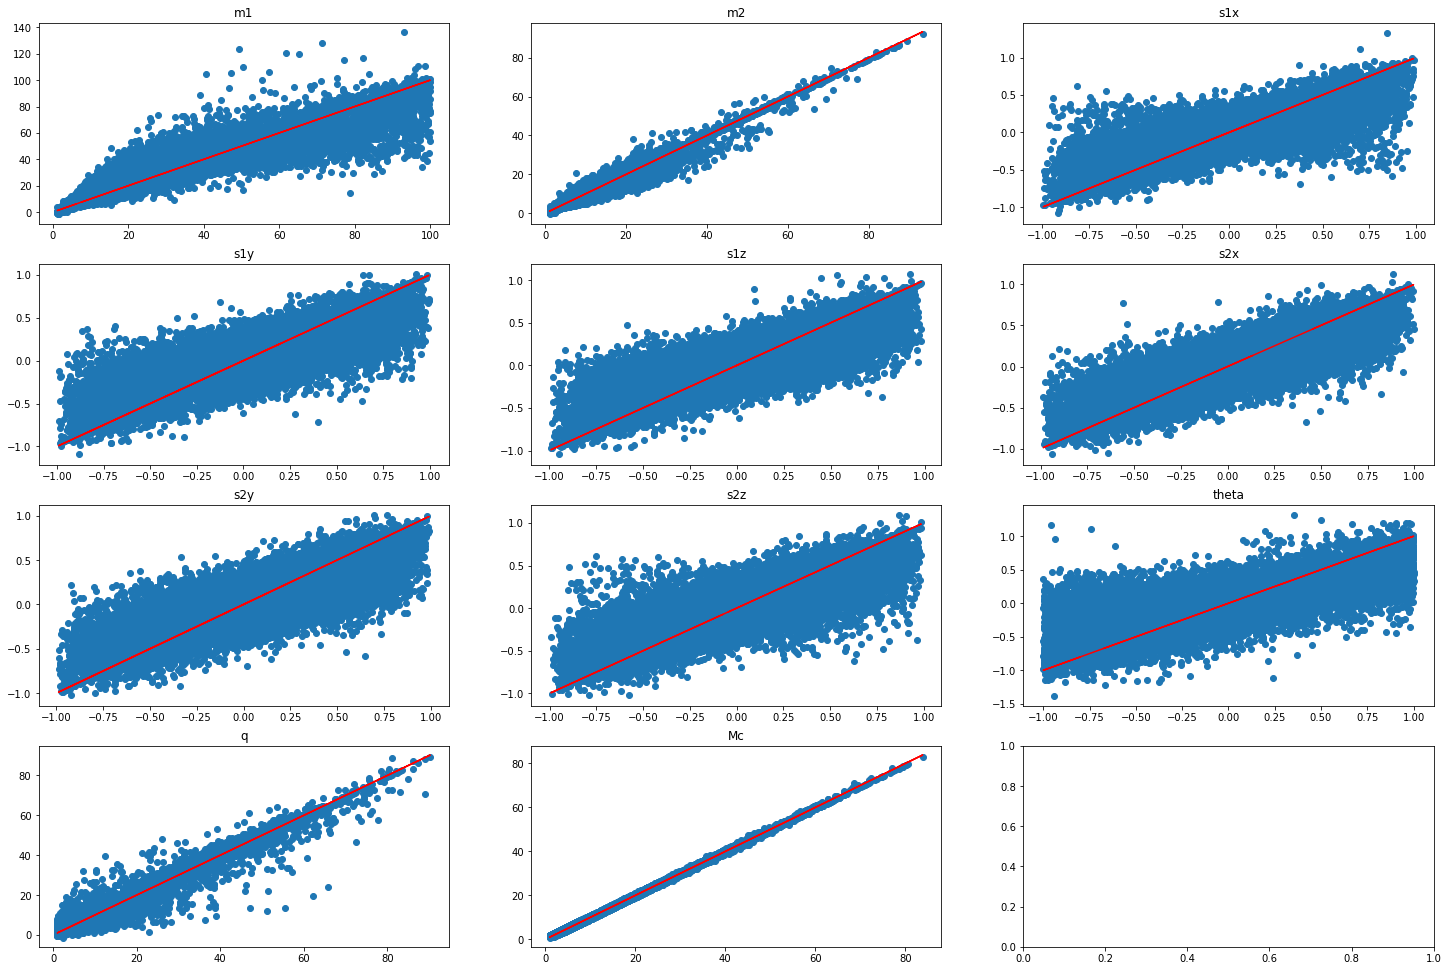

********************************************************************************
Key: v2c0
********************************************************************************
../NewRealistic/v2c0train_x.csv loaded
../NewRealistic/v2c0train_y.csv loaded
../NewRealistic/v2c0test_x.csv loaded
../NewRealistic/v2c0test_y.csv loaded

SVR, rbf kernel, C=1, eps=0.01 :
score # 0: 0.72682
score # 1: 0.95286
score # 2: 0.07475
score # 3: 0.18434
score # 4: 0.16521
score # 5: 0.10869
score # 6: 0.10990
score # 7: 0.19281
score # 8: 0.17092
score # 9: 0.46962
score #10: 0.99829


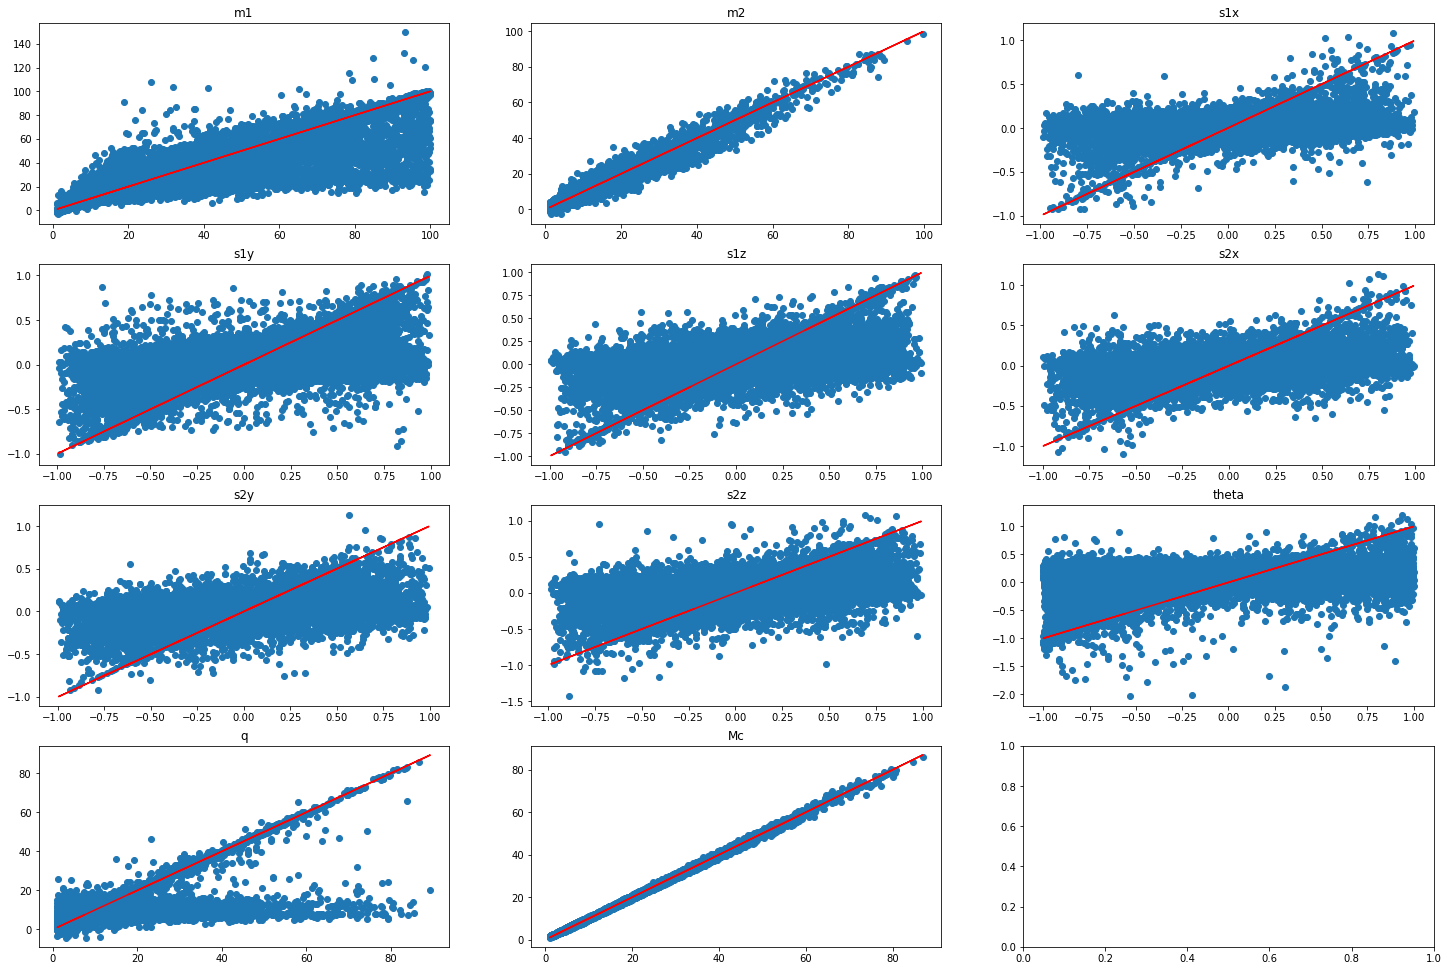

********************************************************************************
Key: v2c1
********************************************************************************
../NewRealistic/v2c1train_x.csv loaded
../NewRealistic/v2c1train_y.csv loaded
../NewRealistic/v2c1test_x.csv loaded
../NewRealistic/v2c1test_y.csv loaded

SVR, rbf kernel, C=1, eps=0.01 :
score # 0: 0.74757
score # 1: 0.95318
score # 2: 0.08074
score # 3: 0.18455
score # 4: 0.17623
score # 5: 0.12655
score # 6: 0.11315
score # 7: 0.18326
score # 8: 0.18801
score # 9: 0.51477
score #10: 0.99821


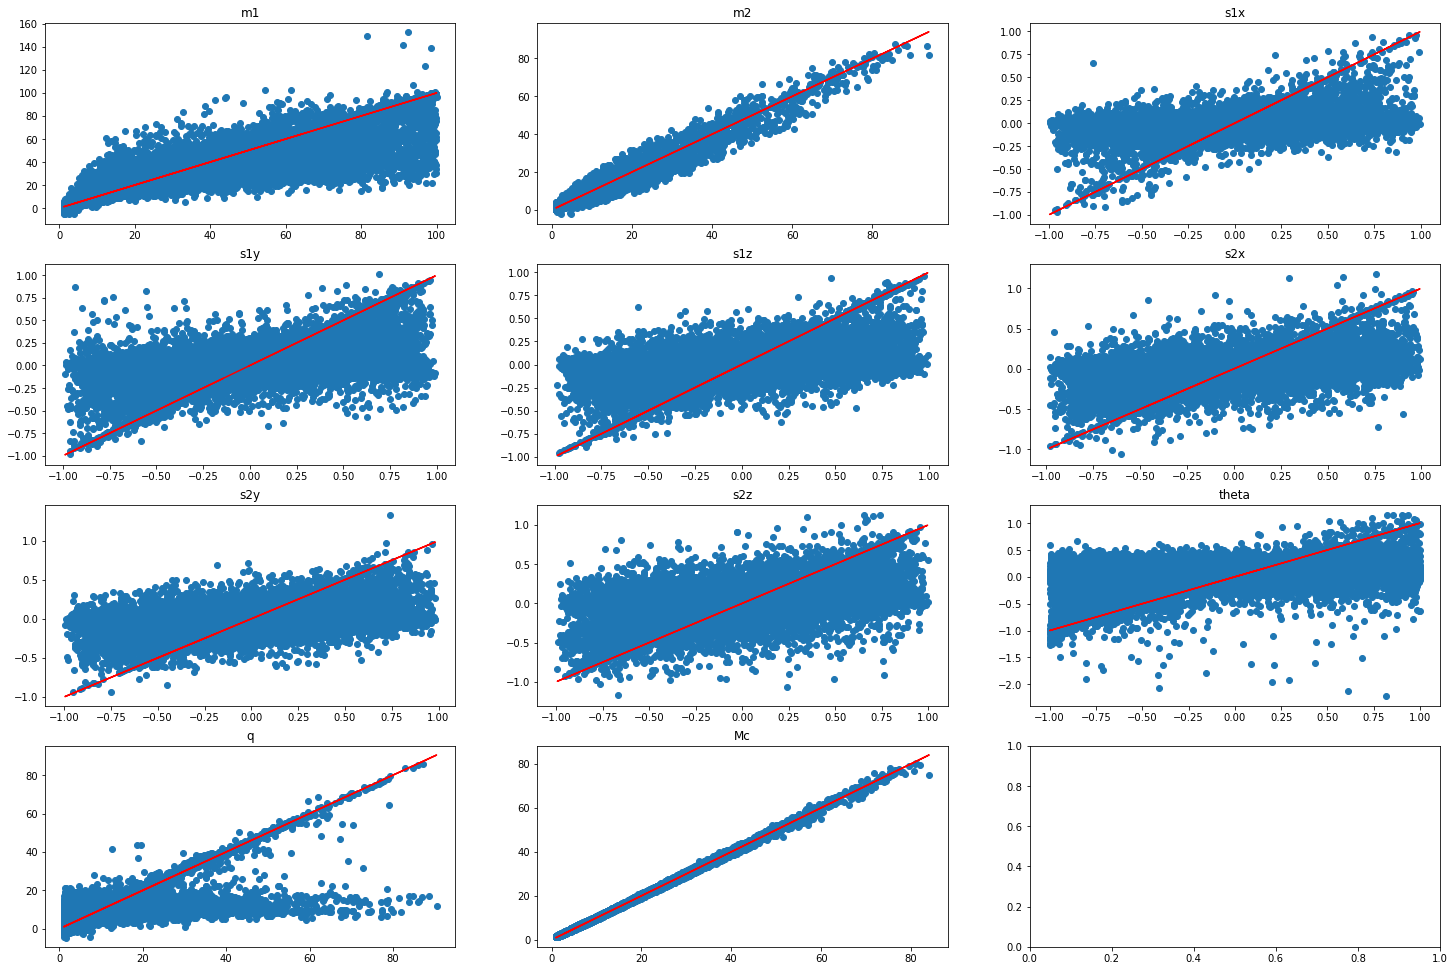

In [6]:
dashes = '*'*80

for key in keys:
    print(dashes, '\nKey: ', key, '\n', dashes, sep='')
        
    # Load all the data for the specific version
    xtrain_tot = extractData(regr_data_dir+key+'train_x.csv', verbose=True)
    ytrain_tot = extractData(regr_data_dir+key+'train_y.csv', verbose=True)
    xtest_tot  = extractData(regr_data_dir+key+'test_x.csv' , verbose=True)
    ytest_tot  = extractData(regr_data_dir+key+'test_y.csv' , verbose=True)
    
    # select a subset according to the input
    xtrain_notnormalized = xtrain_tot[0:Ntrain,:]
    ytrain_notnormalized = ytrain_tot[0:Ntrain,:]
    xtest_notnormalized  = xtrain_tot[0:Ntest,:]
    ytest_notnormalized  = ytrain_tot[0:Ntest,:]
    
    # normalize (eventually)
    if normalize_x:
        # find maxima and minima to use in normalization
        data_x_max = np.zeros((1,Nfeatures))
        data_x_min = np.zeros((1,Nfeatures))
        for i in range(0, Nfeatures):
            data_x_max[0,i] = max(xtrain_notnormalized[:,i])
            data_x_min[0,i] = min(xtrain_notnormalized[:,i])
        xtrain = normalize_data(xtrain_notnormalized, A, B, data_x_max, data_x_min)
        xtest  = normalize_data(xtest_notnormalized , A, B, data_x_max, data_x_min)
    else:
        xtrain = xtrain_notnormalized
        xtest  = xtest_notnormalized

    if normalize_y:
        # find maxima and minima to use in normalization
        data_y_max = np.zeros((1,Nfeatures))
        data_y_min = np.zeros((1,Nfeatures))
        for i in range(0, Nfeatures):
            data_y_max[0,i] = max(ytrain_notnormalized[:,i])
            data_y_min[0,i] = min(ytrain_notnormalized[:,i])
        ytrain = normalize_data(ytrain_notnormalized, A, B, data_y_max, data_y_min)
        ytest  = normalize_data(ytest_notnormalized , A, B, data_y_max, data_y_min)
    else:
        ytrain = ytrain_notnormalized
        ytest  = ytest_notnormalized
        
    # train and stor prediction
    C   = datasets[key].C
    eps = datasets[key].eps
    ypredicted_SVR = np.zeros((Ntest, Nfeatures))
    print('\nSVR, rbf kernel, C=', C,', eps=', eps, ' :', sep='')
    scores = np.zeros(Nfeatures)
    # initialize a list of models
    regres = []
    t0 = time.perf_counter()
    for i in range(0,Nfeatures):
        ytrain_SVR_1d = ytrain[:,i]
        ytest_SVR_1d  = ytest[:,i]
        regr    = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=C, epsilon=eps))
        regr.fit(xtrain, ytrain_SVR_1d)
        scores[i] = regr.score(xtest, ytest_SVR_1d)
        regres.append(regr)
        print('score #{:2d}: {:.5f}'.format(i, scores[i]))
        ypredicted_SVR_1d = regr.predict(xtest)
        ypredicted_SVR[:,i] = ypredicted_SVR_1d
    
    elapsed_time = time.perf_counter()-t0
    
    # update dictionary adding data (both normalized and not), model and score
    datasets[key].ctime  = elapsed_time
    datasets[key].scores = scores
    datasets[key].models = regres
    
    
    # notation a little bit confusing, to improve.
    # In the dictionary the xtrain, ytrain etc. are NOT NORMALIZED in order to be coerent with .predict
    datasets[key].xtrain_normalized    = xtrain
    datasets[key].ytrain_normalized    = ytrain
    datasets[key].xtest_normalized     = xtest
    datasets[key].ytest_normalized     = ytest
    datasets[key].predicted_normalized = ypredicted_SVR
    
    datasets[key].xtrain = xtrain_notnormalized
    datasets[key].ytrain = ytrain_notnormalized
    datasets[key].xtest  = xtest_notnormalized
    datasets[key].ytest  = ytest_notnormalized
    if normalize_y:
        datasets[key].predicted = original_data(ypredicted_SVR, A, B, data_y_max, data_y_min)
    else:
        datasets[key].predicted = ypredicted_SVR
    
    # plot
    PredictionPlots(datasets[key].ytest, datasets[key].predicted, features_names)
    

In [7]:
# just a check to see if the dictionary is ok
#for key in keys:
#    print('\nCheck on dictionary, everything should be 0:')
#    for i in range(0, Nfeatures):
#        model = datasets[key].models[i]
#        model.score(xtest, datasets[key].ytest[:,i])
#        print('#{:2d}: {:.5f}'.format(i, datasets[key].scores[i]- \
#                    model.score(datasets[key].xtest_normalized, datasets[key].ytest_normalized[:,i])))

## Produce CSV files and save models

In [8]:
if write_output:
    for key in keys:
        # save csv
        filename = out_data_dir+'SVR_'+key+'.csv'
        writeResult(filename, datasets[key].predicted, verbose=True)
        
        # save model
        dict_name = out_data_dir+'SVR_'+key+'_dict.sav'
        pickle.dump(datasets[key].models, open(dict_name, 'wb'))
        print(dict_name, 'saved') 
        
        # example for loading models
        dict_name    = out_data_dir+'SVR_'+key+'_dict.sav'
        print('Loading', dict_name, '...')
        loaded_model = pickle.load(open(dict_name, 'rb'))
        result       = loaded_model[1].score(datasets[key].xtest_normalized, datasets[key].ytest_normalized[:,1])
        print('Score for features #1 of the model ', key, ': ', result, '\n', sep='')

../SVR_results/SVR_v0c0.csv saved
../SVR_results/SVR_v0c0_dict.sav saved
Loading ../SVR_results/SVR_v0c0_dict.sav ...
Score for features #1 of the model v0c0: 0.997313244614176

../SVR_results/SVR_v0c1.csv saved
../SVR_results/SVR_v0c1_dict.sav saved
Loading ../SVR_results/SVR_v0c1_dict.sav ...
Score for features #1 of the model v0c1: 0.9974641488406368

../SVR_results/SVR_v1c0.csv saved
../SVR_results/SVR_v1c0_dict.sav saved
Loading ../SVR_results/SVR_v1c0_dict.sav ...
Score for features #1 of the model v1c0: 0.9707662633976031

../SVR_results/SVR_v1c1.csv saved
../SVR_results/SVR_v1c1_dict.sav saved
Loading ../SVR_results/SVR_v1c1_dict.sav ...
Score for features #1 of the model v1c1: 0.9681271106283736

../SVR_results/SVR_v2c0.csv saved
../SVR_results/SVR_v2c0_dict.sav saved
Loading ../SVR_results/SVR_v2c0_dict.sav ...
Score for features #1 of the model v2c0: 0.9528638886060656

../SVR_results/SVR_v2c1.csv saved
../SVR_results/SVR_v2c1_dict.sav saved
Loading ../SVR_results/SVR_v2c1_d